# Data Visualization Final

In [10]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library


In [11]:
!conda install -c anaconda xlrd --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [12]:
df_svy = pd.read_csv('https://cocl.us/datascience_survey_data')
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [13]:
df_svy.head()

,Unnamed: 0,Very interested,Somewhat interested,Not interested
0,Big Data (Spark / Hadoop),1332,729,127
1,Data Analysis / Statistics,1688,444,60
2,Data Journalism,429,1081,610
3,Data Visualization,1340,734,102
4,Deep Learning,1263,770,136


In [14]:
df_svy.rename(columns={'Unnamed: 0':'Area'}, inplace=True)

In [15]:
df_svy.set_index('Area', inplace=True)

In [16]:
df_svy

,Very interested,Somewhat interested,Not interested
Area,,,
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


In [206]:
df_svy.sort_values(['Very interested'], ascending=False, axis=0, inplace=True)

In [207]:
df_svy.head()

,Very interested,Somewhat interested,Not interested
Area,,,
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136


In [208]:
df_svy['Very interested']= (100. * (df_svy['Very interested'] / 2233)).round(2)
df_svy['Somewhat interested']= (100. * (df_svy['Somewhat interested'] / 2233)).round(2)
df_svy['Not interested']= (100. * (df_svy['Not interested'] / 2233)).round(2)

In [209]:
df_svy.head()

,Very interested,Somewhat interested,Not interested
Area,,,
Data Analysis / Statistics,75.59,19.88,2.69
Machine Learning,72.95,21.36,3.31
Data Visualization,60.01,32.87,4.57
Big Data (Spark / Hadoop),59.65,32.65,5.69
Deep Learning,56.56,34.48,6.09


In [210]:
topics = ['Data Analysis/Statistics','Machine Learning','Data Visualization','Big Data(Spark/Hadoop)','Deep Learning']
print(topics)
interest = ['Very interested','Somewhat interested','Not interested']
print(interest)

['Data Analysis/Statistics', 'Machine Learning', 'Data Visualization', 'Big Data(Spark/Hadoop)', 'Deep Learning']
['Very interested', 'Somewhat interested', 'Not interested']


In [211]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.1


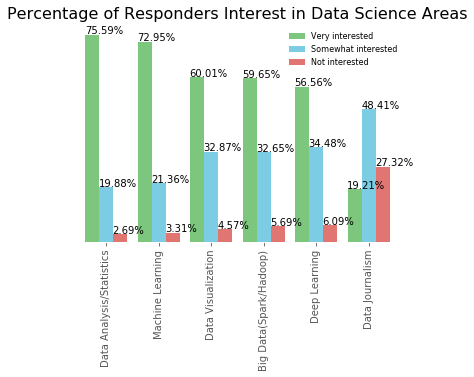

<Figure size 1440x576 with 0 Axes>

In [218]:


n_groups = 6
vi=df_svy['Very interested']
si=df_svy['Somewhat interested']
ni=df_svy['Not interested']
labels= ('Data Analysis/Statistics', 'Machine Learning', 'Data Visualization', 'Big Data(Spark/Hadoop)', 'Deep Learning', 'Data Journalism')
# create plot
fig, ax = plt.subplots()
index = np.arange(0,18,3)
bar_width = 0.8
opacity = 0.8

bar1 = plt.bar(index, vi , bar_width,
alpha=opacity,
color='#5cb85c',
label='Very interested')

bar2 = plt.bar(index + bar_width, si, bar_width,
alpha=opacity,
color='#5bc0de',
label='Somewhat interested'
              )
                             
bar3 = plt.bar(index + 2*bar_width, ni, bar_width,
alpha=opacity,
color='#d9534f',
label='Not interested')
 
                                                    
plt.xlabel('')
plt.ylabel('')
plt.title('Percentage of Responders Interest in Data Science Areas', fontsize=16)
plt.xticks(index + (bar_width),labels, rotation = 'vertical') 
plt.yticks(fontsize=14)
plt.legend(loc= 'upper right', fontsize=8, frameon=False)
plt.figure(figsize=(20,8), frameon=False)
 
ax.grid(False)
# Hide axes ticks
ax.set_yticks([])
ax.set_facecolor('xkcd:white')
    
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(i.get_height())+'%', fontsize=10,
                color='black')

plt.show()